# Build and Optimize Data Warehouses with BigQuery: Challenge Lab

This notebook is written to document my solutions to the Google Cloud [challenge lab](https://www.cloudskillsboost.google/focuses/14341?parent=catalog) for the **[Build and Optimize Data Warehouses with BigQuery](https://www.cloudskillsboost.google/quests/147?qlcampaign=1p-EDUCR-SG-2021-MAJULAHGCP-2-25)** quest.

You can earn a skill badge after completing the quest and the challenge lab.

[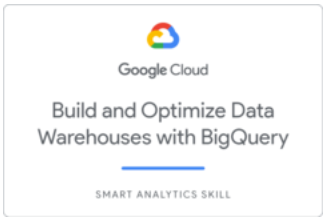](https://www.cloudskillsboost.google/public_profiles/c0a951c2-747f-4e4a-9520-3a67696131fb)

Topics tested:

- Use BigQuery to access public COVID and other demographic datasets.
- Create a new BigQuery dataset which will store your tables.
- Add a new date partitioned table to your dataset.
- Add new columns to this table with appropriate data types.
- Run a series of JOINS to populate these new columns with data drawn from other tables.

# Challenge scenario

You are part of an international public health organization which is tasked with developing a machine learning model to predict the daily case count for countries during the Covid-19 pandemic. As a junior member of the Data Science team you've been assigned to use your data warehousing skills to develop a table containing the features for the machine learning model.

Your first step is to create a new dataset and table. The starting point for the machine learning model will be the `oxford_policy_tracker` table in the [COVID 19 Government Response public dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=covid19_govt_response&page=dataset) which contains details of different actions taken by governments to curb the spread of Covid-19 in their jurisdictions. Given the fact that there will be models based on a range of time periods, you are instructed to create a new dataset and then create a date partitioned version of the `oxford_policy_tracker` table in your newly created dataset, with an expiry time set to 90 days. You have also been instructed to exclude the United Kingdom ( `alpha_3_code='GBR'`), Brazil ( `alpha_3_code='BRA'`), Canada ( `alpha_3_code='CAN'`) & the United States of America (`alpha_3_code='USA'`) as these will be subject to more in-depth analysis through nation and state specific analysis.

Then, in terms of additional information that is required, you have been told to add columns for `population`, `country_area` and a record column (named `mobility`) that will take six input fields representing average mobility data from the last six columns of the `mobility_report` table from the [Google COVID 19 Mobility public dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=covid19_google_mobility&page=dataset).

A colleague working on an ancillary task has provided you with the SQL they used for updating the daily new case data in a similar data partitioned table through a JOIN with the `covid_19_geographic_distribution_worldwide` table from the [European Center for Disease Control COVID 19 public dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=covid19_ecdc&page=dataset). This is a useful table that contains a range of data, including recent national population data, that you should use to populate the population column in your table.

```
UPDATE
    covid.oxford_policy_tracker t0
SET
    t0.population = t2.pop_data_2019
FROM
    (SELECT DISTINCT country_territory_code, pop_data_2019 
    FROM `bigquery-public-data.covid19_ecdc.covid_19_geographic_distribution_worldwide`) AS t2
WHERE t0.alpha_3_code = t2.country_territory_code;
```

The above template updates a daily new case column so you must modify it before you can use it to populate the population data from the [European Center for Disease Control COVID 19 public dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=covid19_ecdc&page=dataset) but the final query will be very similar.

In addition to population date you must also add in country area data to your table. The data for geographic country areas can be found in the `country_names_area` table from the [Census Bureau International public dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=census_bureau_international&page=dataset).

The last data ingestion task requires you to extract average values for the the six component fields that comprise the `mobility` record data from the `mobility_report` table from the [Google COVID 19 Mobility public dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=covid19_google_mobility&page=dataset). You need to be aware that the mobility information might be broken down by sub-regions for some countries so there may be more than one daily record for each country. However the machine learning model you are working on will only operate on a country level so you must extract a daily average for these mobility fields that aggregates all daily records for each country into a single average for each mobility record element.

In order to ensure you are aligned with the rest of the team the following column names and data types have been specified that you must use when updating the schema for your table:

```
New Column Name          SQL Data Type
population               INTEGER
country_area             FLOAT
mobility                 RECORD
mobility.avg_retail      FLOAT
mobility.avg_grocery     FLOAT
mobility.avg_parks       FLOAT
mobility.avg_transit     FLOAT
mobility.avg_workplace   FLOAT
mobility.avg_residential FLOAT
```

Your coworker has also given you a SQL snippet that is currently being used to analyze trends in the Google Mobility data daily mobility patterns. You should be able to use this as part of the query that will add the daily country data for the mobility record in your table.

```
 SELECT country_region, date,
      AVG(retail_and_recreation_percent_change_from_baseline) as avg_retail,
      AVG(grocery_and_pharmacy_percent_change_from_baseline)  as avg_grocery,
      AVG(parks_percent_change_from_baseline) as avg_parks,
      AVG(transit_stations_percent_change_from_baseline) as avg_transit,
      AVG( workplaces_percent_change_from_baseline ) as avg_workplace,
      AVG( residential_percent_change_from_baseline)  as avg_residential
      FROM `bigquery-public-data.covid19_google_mobility.mobility_report`
      GROUP BY country_region, date
```

When performing the JOINs between these various tables, you will need to use either the `alpha_3_code` column which is the 3 letter country code, or the `country_name` column in your table which contains the full official country name. The corresponding column names in the secondary data tables may be different.

For your final task you must identify data issues that will need to be resolved by another member of your team. Once you have your columns populated, please run a query that returns a combined list of the `DISTINCT` countries that do not have any population data and countries that do not have country area information, ordered by country name. If a country has neither population nor country area it should appear twice. This will give you an idea of problematic countries.

# Task 1: Create a table partitioned by date

Create a new dataset `covid_458` and create a table `oxford_policy_tracker_157` in that dataset partitioned by date, with an expiry of 90 days. The table should initially use the schema defined for the `oxford_policy_tracker` table in the [COVID 19 Government Response public dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=covid19_govt_response&page=dataset).

You must also populate the table with the data from the source table for all countries except the United Kingdom (GBR), Brazil (BRA), Canada (CAN) and the United States (USA).

### Solution for Task 1:

Created the dataset `covid_458`.

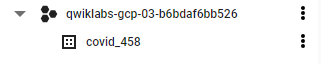

This is the preview of `oxford_policy_tracker` table in the [COVID 19 Government Response public dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=covid19_govt_response&page=dataset).

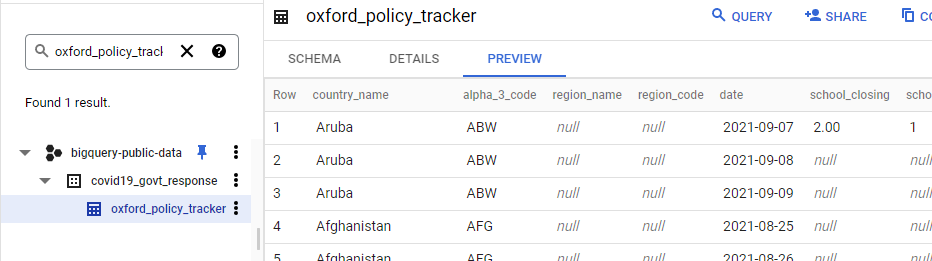

Run the following query to create the dataset partitioned by date.

(Reference: https://cloud.google.com/bigquery/docs/reference/standard-sql/data-definition-language#creating_a_partitioned_table_from_the_result_of_a_query)

In [ ]:
CREATE OR REPLACE TABLE covid_458.oxford_policy_tracker_157
PARTITION BY date
OPTIONS
(
    partition_expiration_days = 90,
    description = 'covid19_govt_response.oxford_policy_tracker table, partitioned by day, expiration set to 90 days.'
) AS
SELECT *
FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
WHERE alpha_3_code NOT IN ('GBR', 'BRA', 'CAN','USA')

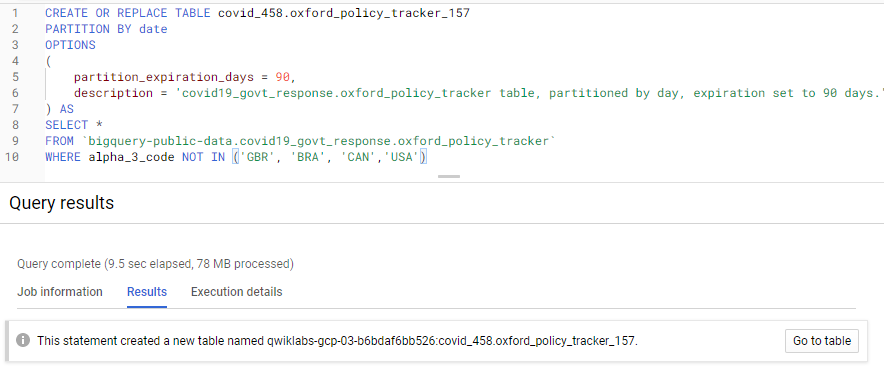

# Task 2: Add new columns to your table

Update your table to add new columns to your table with the appropriate data types to ensure alignment with the specification provided to you.

```
New Column Name          SQL Data Type
population               INTEGER
country_area             FLOAT
mobility                 RECORD
mobility.avg_retail      FLOAT
mobility.avg_grocery     FLOAT
mobility.avg_parks       FLOAT
mobility.avg_transit     FLOAT
mobility.avg_workplace   FLOAT
mobility.avg_residential FLOAT
```

Tip: When updating the schema for a BigQuery table you can use the console to add the columns and record elements or you can use the command line bqutility to update the schema by providing a JSON file with all of field definitions as explained in the [BigQuery Standard SQL reference documentation](https://cloud.google.com/bigquery/docs/managing-table-schemas#manually_adding_an_empty_column).

### Solution for Task 2 is below.

(Reference: https://cloud.google.com/bigquery/docs/reference/standard-sql/data-definition-language#adding_a_record_column)

In [ ]:
ALTER TABLE covid_458.oxford_policy_tracker_157
ADD COLUMN population INT64,
ADD COLUMN country_area FLOAT64,
ADD COLUMN mobility STRUCT<
   avg_retail      FLOAT64,
   avg_grocery     FLOAT64,
   avg_parks       FLOAT64,
   avg_transit     FLOAT64,
   avg_workplace   FLOAT64,
   avg_residential FLOAT64
   >

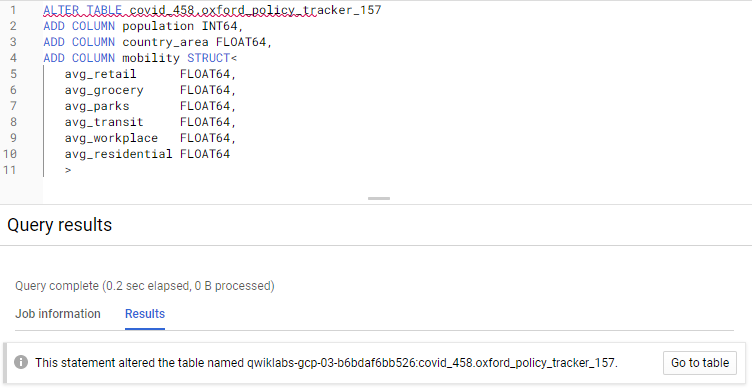

# Task 3: Add country population data to the `population` column

Add the country population data to the `population` column in your table with `covid_19_geographic_distribution_worldwide` table data from the [European Center for Disease Control COVID 19 public dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=covid19_ecdc&page=dataset) table.

Tip: The `covid19_ecdc` table in the [European Center for Disease Control COVID 19 public dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=covid19_ecdc&page=dataset) contains a population column that you can use to populate the `population` column in your dataset.

### Solution for Task 3:

This is the preview of `covid_19_geographic_distribution_worldwide` table from the [European Center for Disease Control COVID 19 public dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=covid19_ecdc&page=dataset).

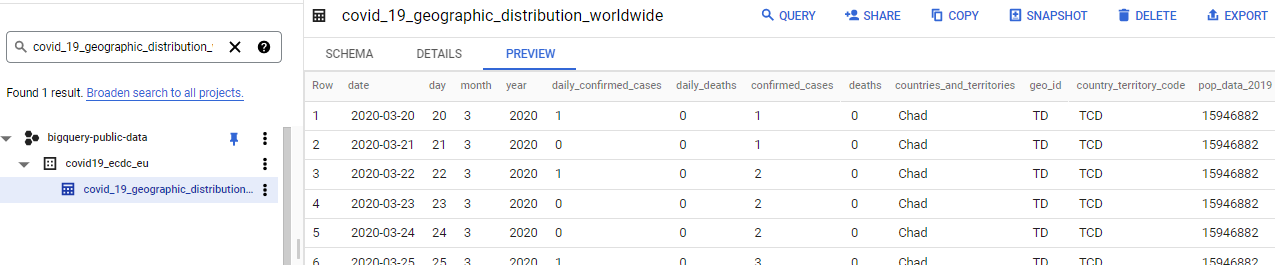

In [ ]:
UPDATE covid_458.oxford_policy_tracker_157 t0
SET t0.population = t2.pop_data_2019
FROM (
    SELECT DISTINCT country_territory_code, pop_data_2019 
    FROM `bigquery-public-data.covid19_ecdc.covid_19_geographic_distribution_worldwide`
    ) AS t2
WHERE t0.alpha_3_code = t2.country_territory_code

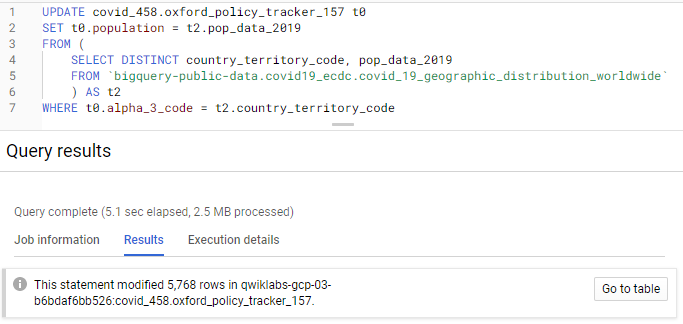

Below is the `population` field after the data update.

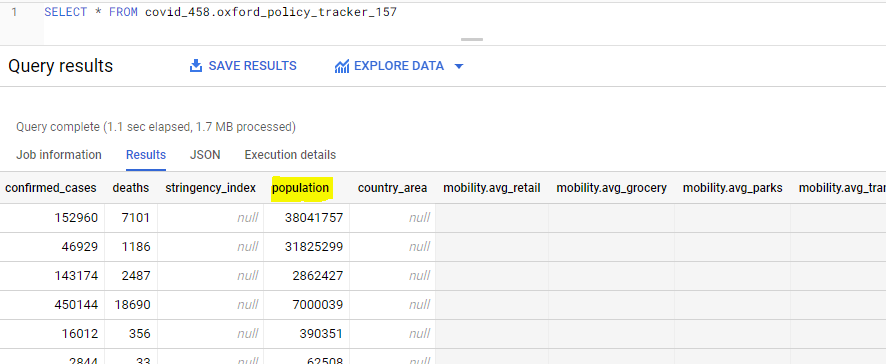

# Task 4: Add country area data to the `country_area` column

Add the country area data to the `country_area` column in your table with `country_names_area` table data from the [Census Bureau International public dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=census_bureau_international&page=dataset).

Tip: The `country_names_area` table from the [Census Bureau International public dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=census_bureau_international&page=dataset) does not contain a three letter country code column, but you can join it to your table using the full text `country_name` column that exists in both tables.

### Solution for Task 4:

This is the preview of `country_names_area` table from the [Census Bureau International public dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=census_bureau_international&page=dataset).

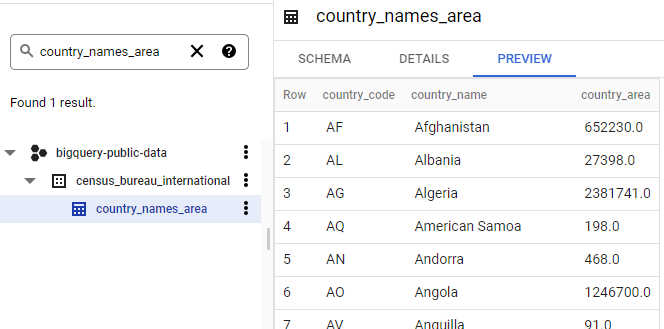


In [ ]:
UPDATE covid_458.oxford_policy_tracker_157 t0
SET t0.country_area = t1.country_area
FROM `bigquery-public-data.census_bureau_international.country_names_area` t1
WHERE t0.country_name = t1.country_name

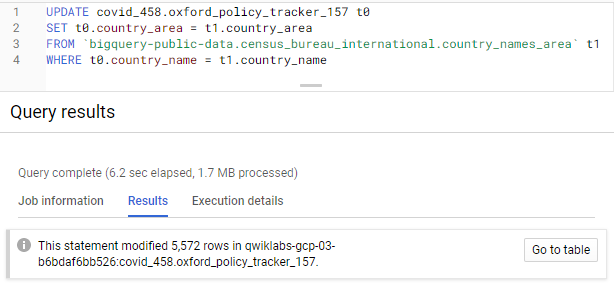

Below is the `country_area` field after the data update.

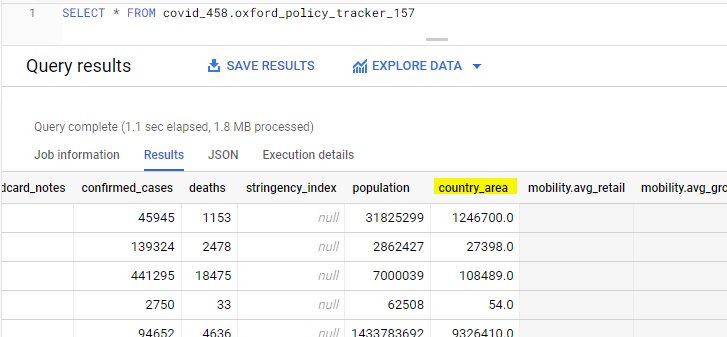

# Task 5: Populate the `mobility` record data

Populate the `mobility` record in your table with data from the [Google COVID 19 Mobility public dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=covid19_google_mobility&page=dataset).

Tip: When updating the `mobility` record remember that you must select (and average) a number of records for each country and date combination so that you get a single average of each child column in the `mobility` record. You must join the resulting data to your working table using the same combination of country name and date that you used to group the source mobility records to ensure there is a unique mapping between the averaged source mobility table results and the records in your table that have a single entry for each country and date combination.

## Solution: 

This is the preview of the `mobility_report` table from the [Google COVID 19 Mobility public dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=covid19_google_mobility&page=dataset).


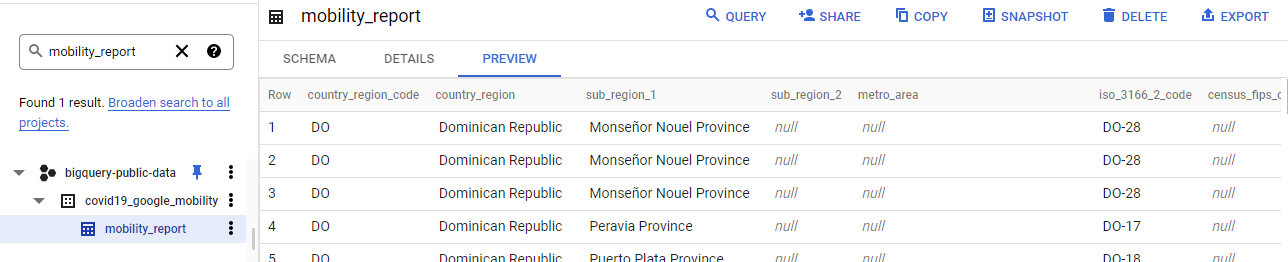

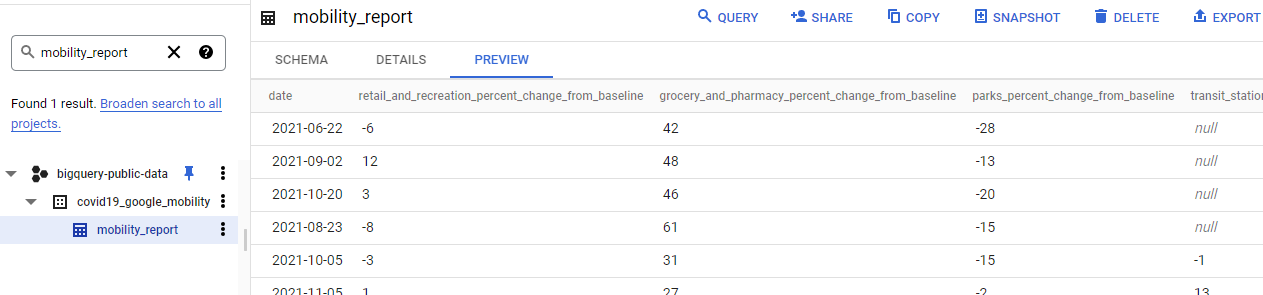

In [ ]:
UPDATE covid_458.oxford_policy_tracker_157 t0
SET
   t0.mobility.avg_retail = t1.avg_retail,
   t0.mobility.avg_grocery = t1.avg_grocery,
   t0.mobility.avg_parks = t1.avg_parks,
   t0.mobility.avg_transit = t1.avg_transit,
   t0.mobility.avg_workplace = t1.avg_workplace,
   t0.mobility.avg_residential = t1.avg_residential
FROM
(SELECT country_region, date,
    AVG(retail_and_recreation_percent_change_from_baseline) as avg_retail,
    AVG(grocery_and_pharmacy_percent_change_from_baseline) as avg_grocery,
    AVG(parks_percent_change_from_baseline) as avg_parks,
    AVG(transit_stations_percent_change_from_baseline) as avg_transit,
    AVG(workplaces_percent_change_from_baseline) as avg_workplace,
    AVG(residential_percent_change_from_baseline) as avg_residential
 FROM `bigquery-public-data.covid19_google_mobility.mobility_report`
 GROUP BY country_region, date
) AS t1
WHERE CONCAT(t0.country_name, t0.date) = CONCAT(t1.country_region, t1.date)

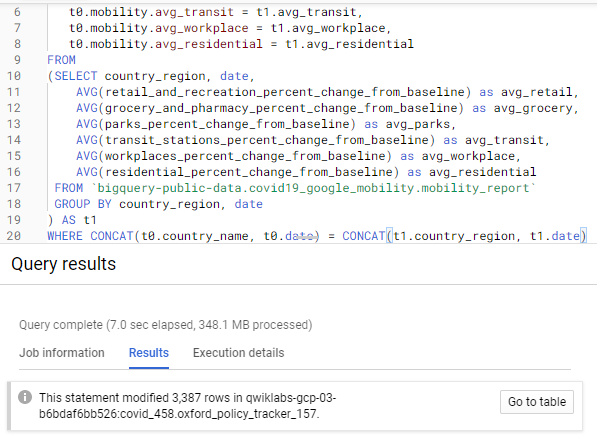

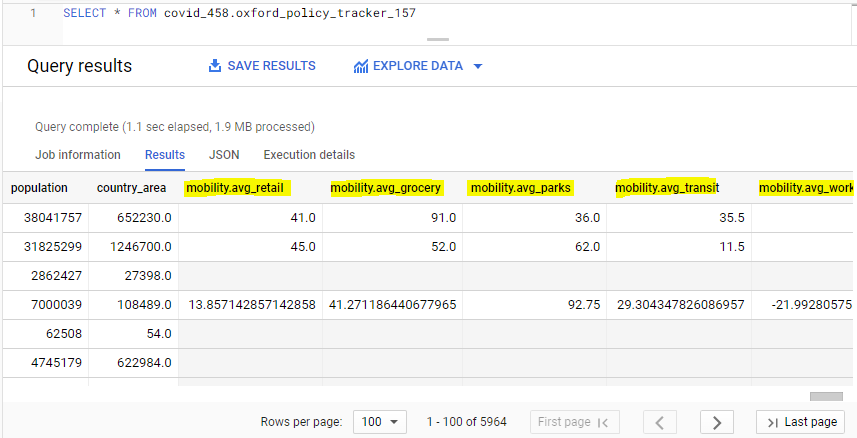

# Task 6: Query missing data in `population` & `country_area` columns
Run a query to find the missing countries in the `population` and `country_area` data. The query should list countries that do not have any population data and countries that do not have country area information, ordered by country name. If a country has neither population or country area it must appear twice.

Tip: The `UNION` option followed by the `ALL` keyword combines the results of two queries where each query lists distinct results without combining duplicate results that arise from the union into a single row.

### Solution for Task 6 is below:

In [ ]:
SELECT DISTINCT country_name
FROM covid_458.oxford_policy_tracker_157
WHERE population is NULL

UNION ALL

SELECT DISTINCT country_name
FROM covid_458.oxford_policy_tracker_157
WHERE country_area is NULL
ORDER BY country_name ASC

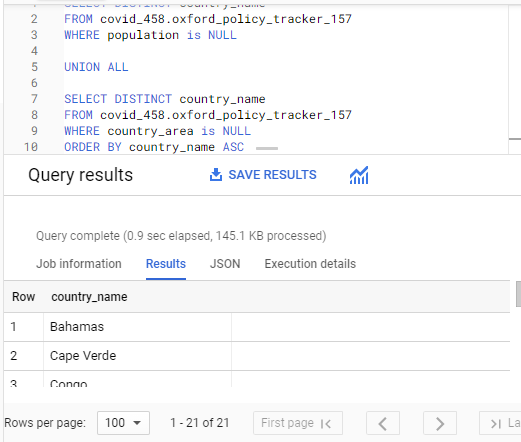